# Load Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch


## Data loading

In [16]:
def load_dataset(file_path, val_ratio=0.2, random_state=42):
    dataset = np.load(file_path)
    Xtr, Str = dataset['Xtr'], dataset['Str']
    Xts, Yts = dataset['Xts'], dataset['Yts']

    # Shuffle & split (80% train, 20% validation)
    np.random.seed(random_state)
    indices = np.arange(len(Str))
    np.random.shuffle(indices)

    split_idx = int(len(Str) * (1 - val_ratio))
    train_idx, val_idx = indices[:split_idx], indices[split_idx:]

    X_train, y_train = Xtr[train_idx], Str[train_idx]
    X_val, y_val = Xtr[val_idx], Str[val_idx]

    return X_train, y_train, X_val, y_val, Xts, Yts

def reshape_mnist(*arrays):
    reshaped = []
    for arr in arrays:
        if arr.ndim >= 2:
            arr = arr.reshape(-1, 1, 28, 28)
        reshaped.append(arr)
    return tuple(reshaped)

def reshape_cifar(*arrays):
    reshaped = []
    for arr in arrays:
        if arr.ndim >= 2:
            arr = np.transpose(arr, (0, 3, 1, 2))
            arr = arr.astype(np.float32) / 255.0
        reshaped.append(arr)
    return tuple(reshaped)



In [17]:
Xtr_03, Str_03, Xval_03, Sval_03, Xts_03, Yts_03 = reshape_mnist(*load_dataset('datasets/FashionMNIST0.3.npz'))
Xtr_06, Str_06, Xval_06, Sval_06, Xts_06, Yts_06 = reshape_mnist(*load_dataset('datasets/FashionMNIST0.6.npz'))
Xtr_cifar, Str_cifar, Xval_cifar, Sval_cifar, Xts_cifar, Yts_cifar = reshape_cifar(*load_dataset('datasets/CIFAR.npz'))

In [20]:
print("Xtr_03:", Xtr_03.shape)
print("Xtr_06:", Xtr_06.shape)
print("Xtr_cifar:", Xtr_cifar.shape)


Xtr_03: (14400, 1, 28, 28)
Xtr_06: (14400, 1, 28, 28)
Xtr_cifar: (12000, 3, 32, 32)


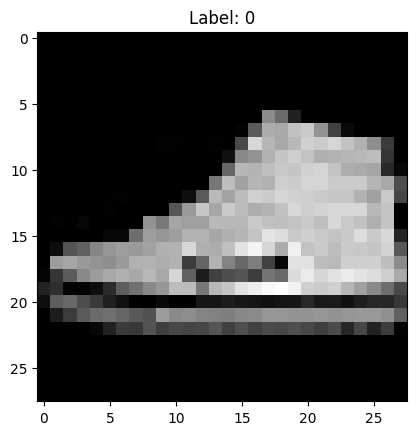

In [37]:
# Mnist data checking
plt.imshow(Xtr_03[114, -1, :, :], cmap='gray') #[pic number,_,_,_]
plt.title(f"Label: {Str_03[0]}")
plt.show()

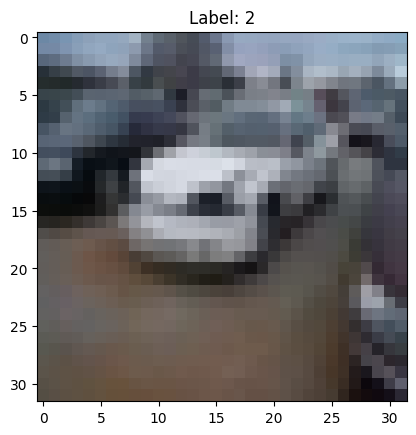

In [39]:
# CIFAR data checking
plt.imshow(np.transpose(Xtr_cifar[514], (1, -1, 0)))
plt.title(f"Label: {Str_cifar[0]}")
plt.show()

# Main Program

## Activate Setting

In [5]:
np.set_printoptions(precision=2,suppress=True)
torch.backends.cudnn.benchmark = True
torch.manual_seed(114514)
torch.cuda.manual_seed(114514)
# GPU
device = torch.device('cuda:'+ str())
loss_func_ce = F.nll_loss